<a href="https://colab.research.google.com/github/prof-fuschilo/FCD/blob/main/Trabalho_FCD_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q yfinance
!pip install -q scikit-learn
!pip install -q scipy

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Para ler dados de ações do Yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# Para data/hora
from datetime import datetime

# Configurar horários de término e início para coleta de dados
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [ ]:
# As ações de tecnologia desta análise
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

#for company, com_name in zip(company_list, company_name):
#    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,Adj Close,Close,High,Low,...,High,Low,Open,Volume,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,GOOG,GOOG,GOOG,GOOG,...,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2024-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,201.449997,201.449997,201.949997,199.000000,199.279999,40685700.0
2024-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,207.860001,207.860001,208.000000,201.789993,201.899994,41673700.0
2024-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,205.740005,205.740005,207.639999,205.050003,206.979996,28061600.0
2024-11-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,207.889999,207.889999,208.199997,204.589996,205.830002,24892400.0
2024-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,210.710007,210.710007,212.990005,209.509995,209.960007,39523200.0
2024-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,213.440002,213.440002,214.020004,209.649994,210.309998,32214800.0
2024-12-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,218.160004,218.160004,220.000000,215.750000,215.960007,48745700.0
2024-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,220.550003,220.550003,222.149994,217.300003,218.029999,41140200.0


In [ ]:
# Informações gerais
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-12-11 to 2024-12-09
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  251 non-null    float64
 1   (Close, AAPL)      251 non-null    float64
 2   (High, AAPL)       251 non-null    float64
 3   (Low, AAPL)        251 non-null    float64
 4   (Open, AAPL)       251 non-null    float64
 5   (Volume, AAPL)     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [ ]:
# Estatísticas
AAPL.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,203.365061,203.855657,205.525339,201.932351,203.653824,5.748921e+07
std,23.209764,23.016746,23.125710,22.649244,22.884095,3.054942e+07
min,164.405121,165.000000,166.399994,164.080002,165.350006,2.811130e+07
25%,183.418907,184.199997,185.119995,182.180000,183.735001,4.203040e+07
50%,206.683105,207.149994,207.160004,196.160004,198.020004,5.008050e+07
75%,225.731651,225.980003,227.329994,223.504997,225.239998,6.394325e+07
max,246.750000,246.750000,247.240005,242.130005,243.990005,3.186799e+08


<Figure size 800x600 with 0 Axes>

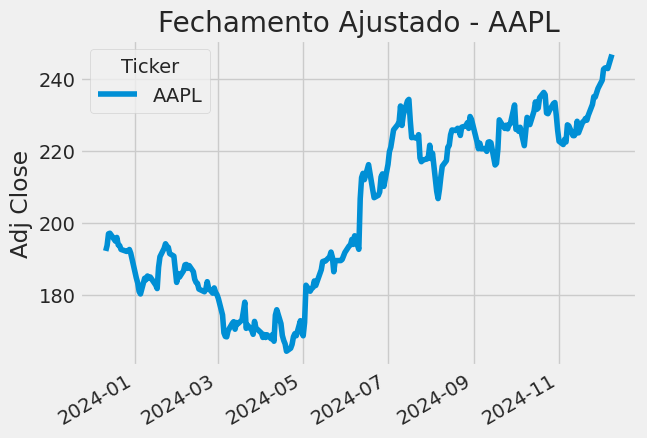

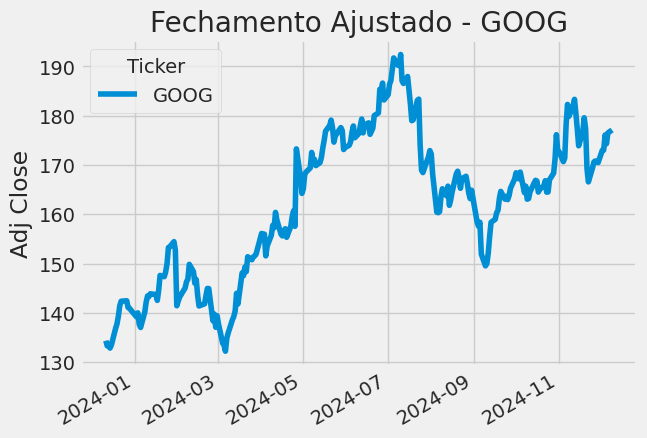

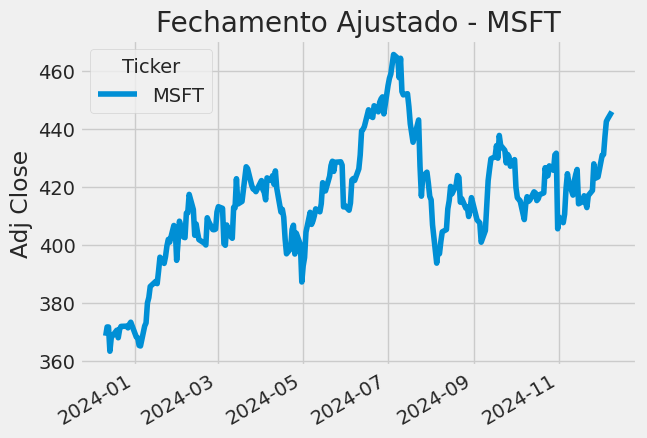

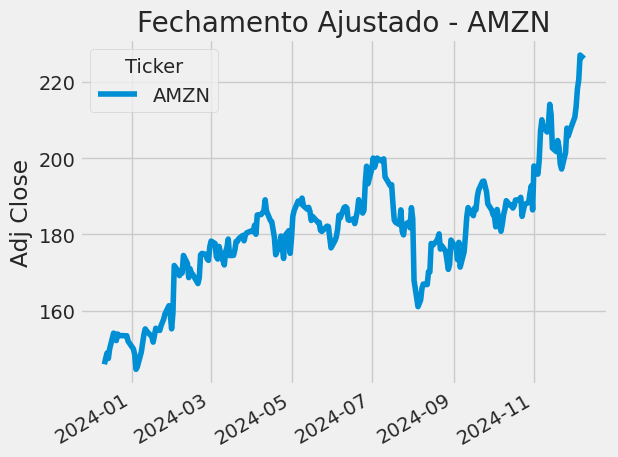

In [ ]:
# Visão histórica do preço de fechamento
plt.figure(figsize=(8,6))

for i, company in enumerate(company_list, 1):
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Fechamento Ajustado - {tech_list[i - 1]}")

plt.tight_layout()


<Figure size 600x600 with 0 Axes>

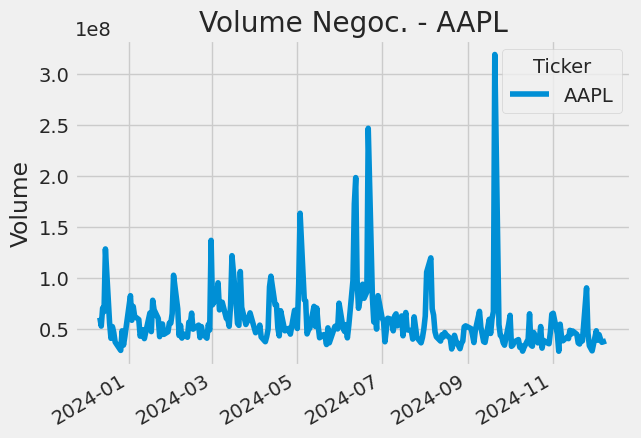

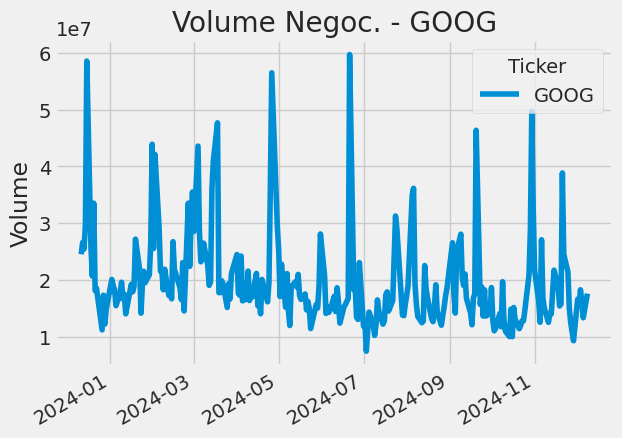

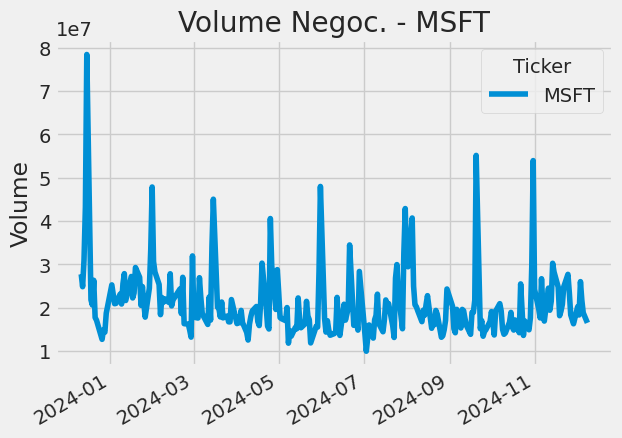

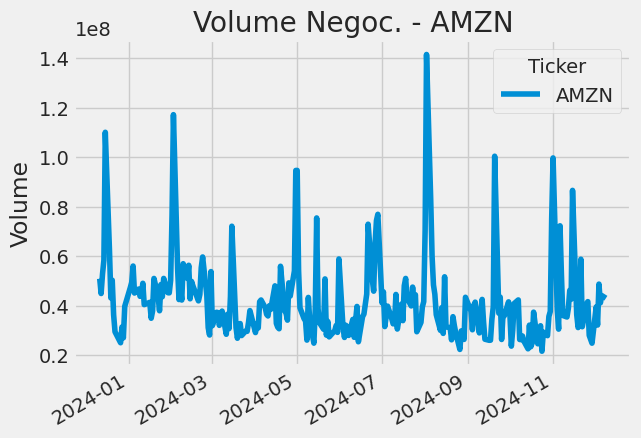

In [ ]:
# Traçando o volume total de ações negociadas a cada dia

plt.figure(figsize=(6,6))

for i, company in enumerate(company_list, 1):
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume Negoc. - {tech_list[i - 1]}")


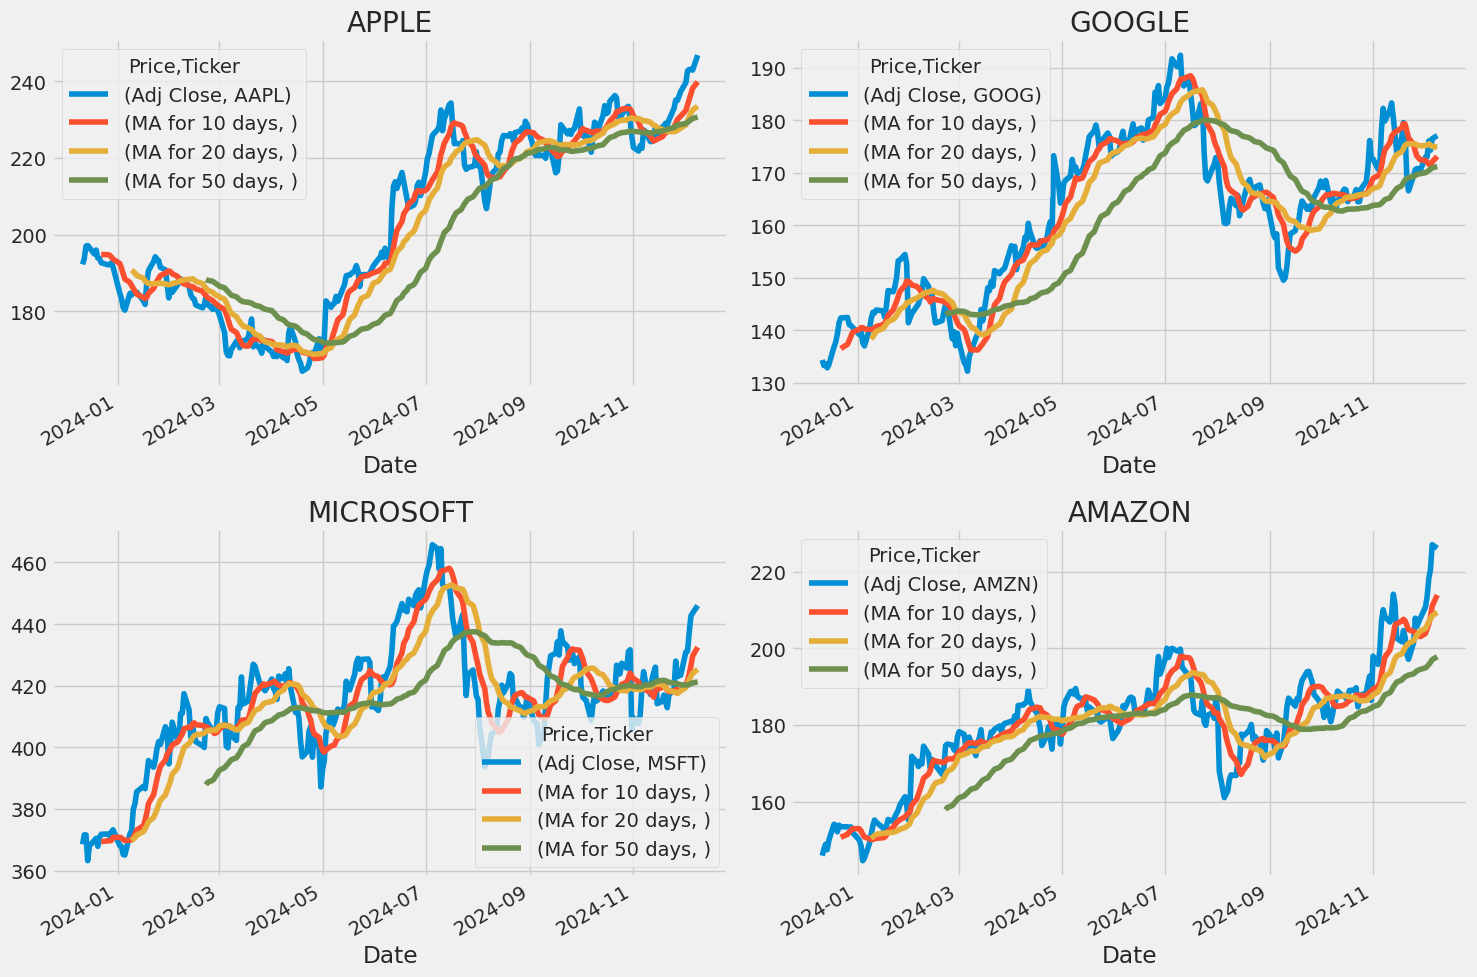

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

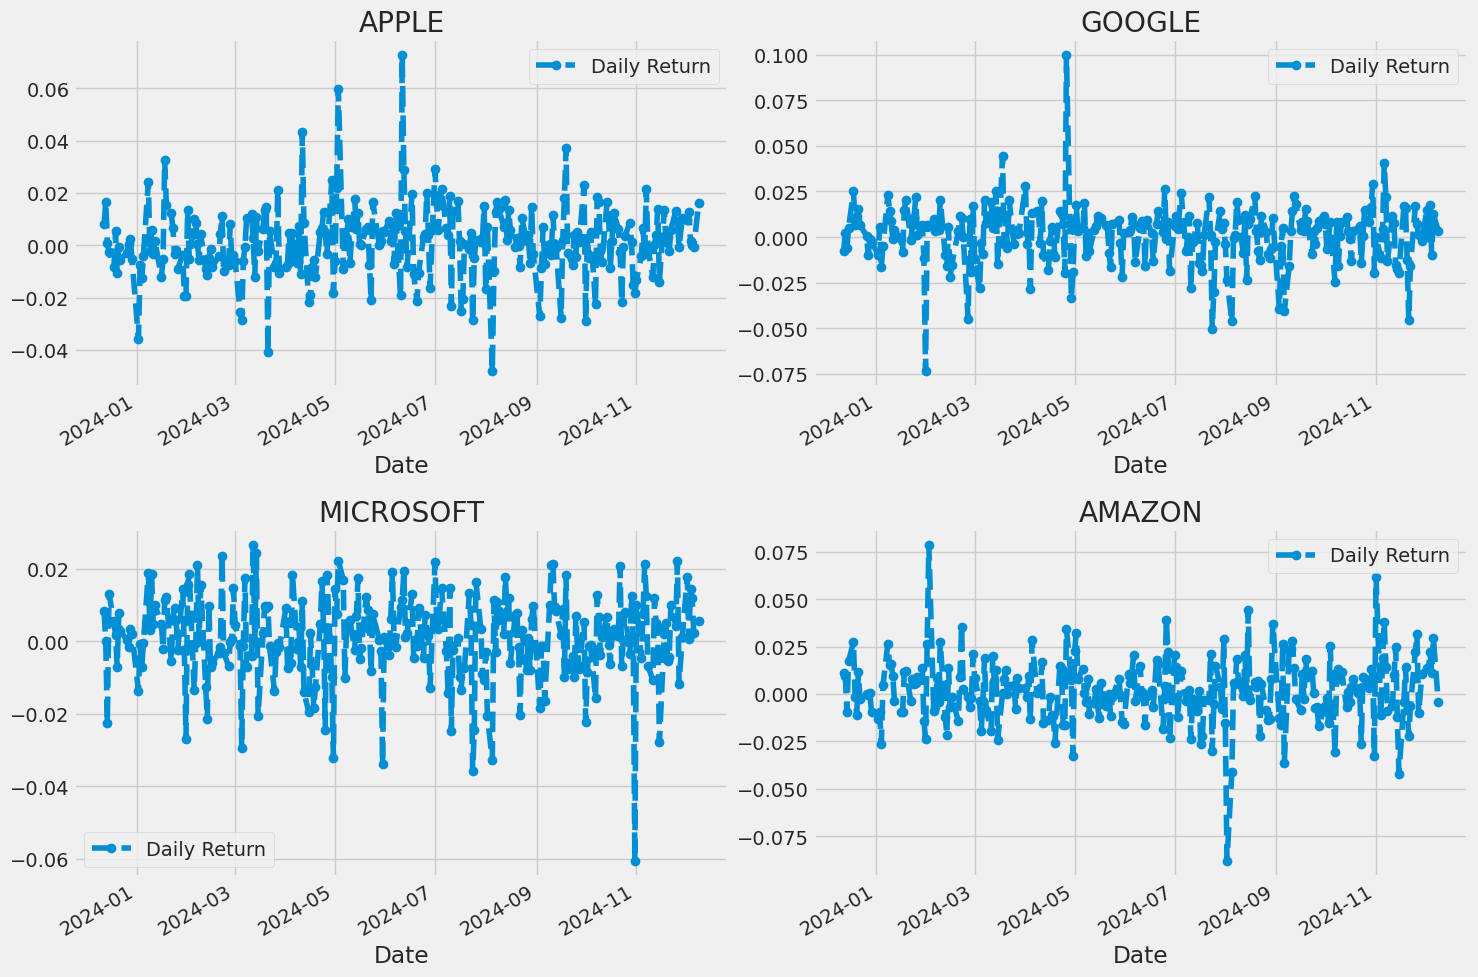

In [ ]:
# Qual foi o retorno diário médio da ação?

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

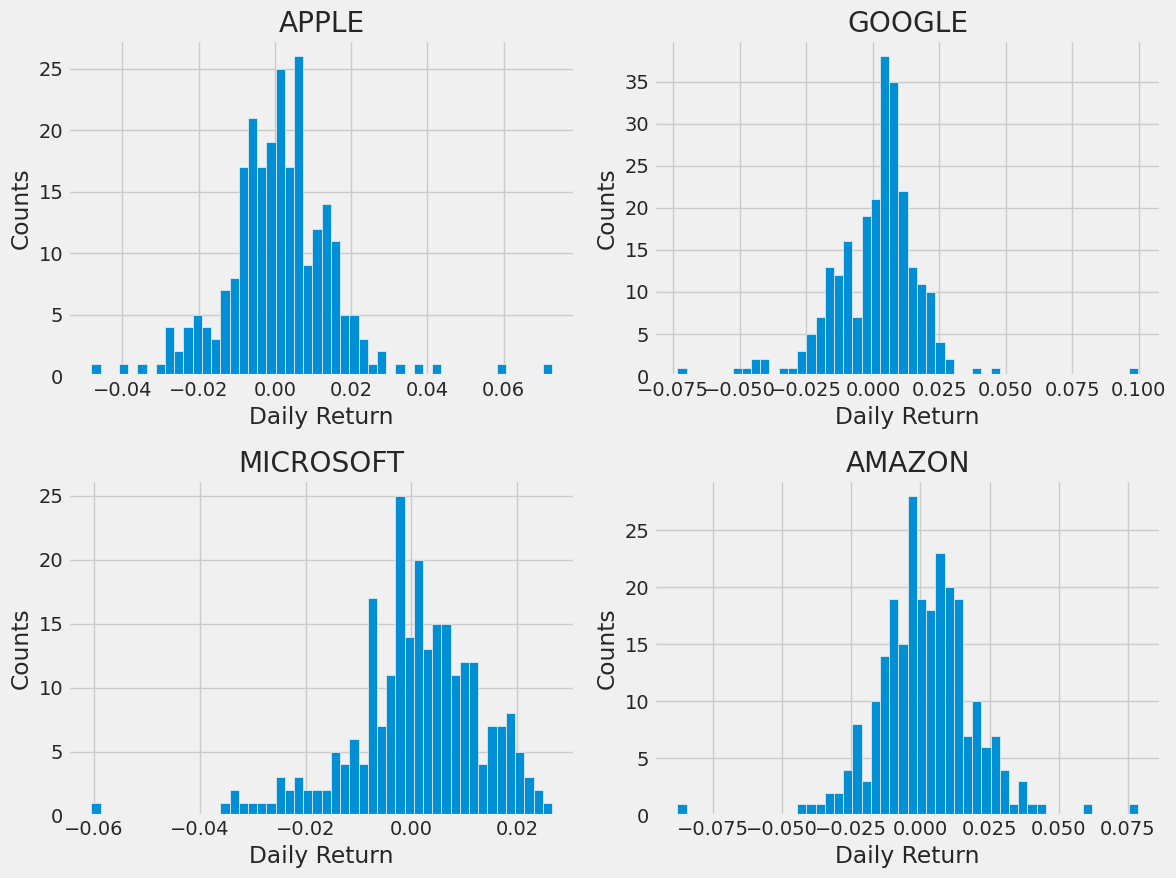

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
# Qual foi a correlação entre os preços de fechamento de diferentes ações?

closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-12-11,NaN,NaN,NaN,NaN
2023-12-12,0.007920,0.010899,-0.007869,0.008295
2023-12-13,0.016692,0.009222,0.002469,-0.000027
2023-12-14,0.000758,-0.009540,-0.005748,-0.022544
2023-12-15,-0.002726,0.017298,0.004805,0.013117


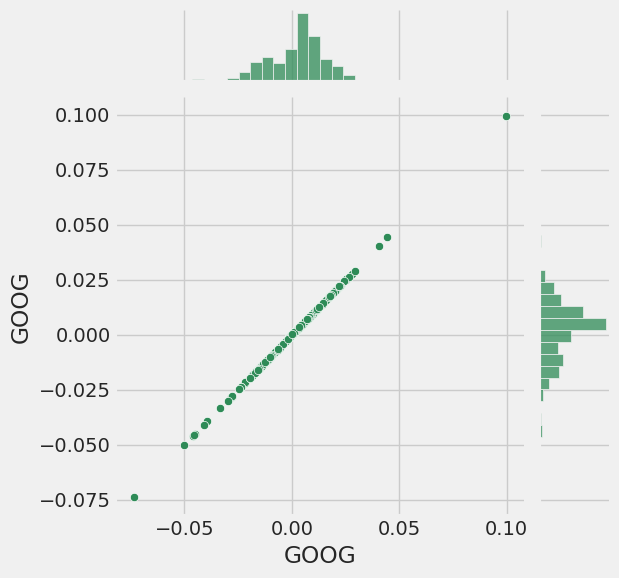

In [ ]:
# Comparar o Google consigo mesmo deveria mostrar uma relação perfeitamente linear
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

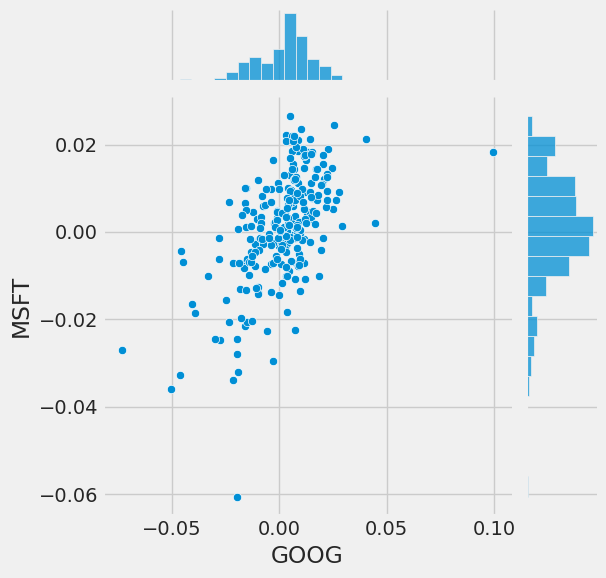

In [ ]:
# Usaremos o joinplot para comparar os retornos diários do Google e da Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

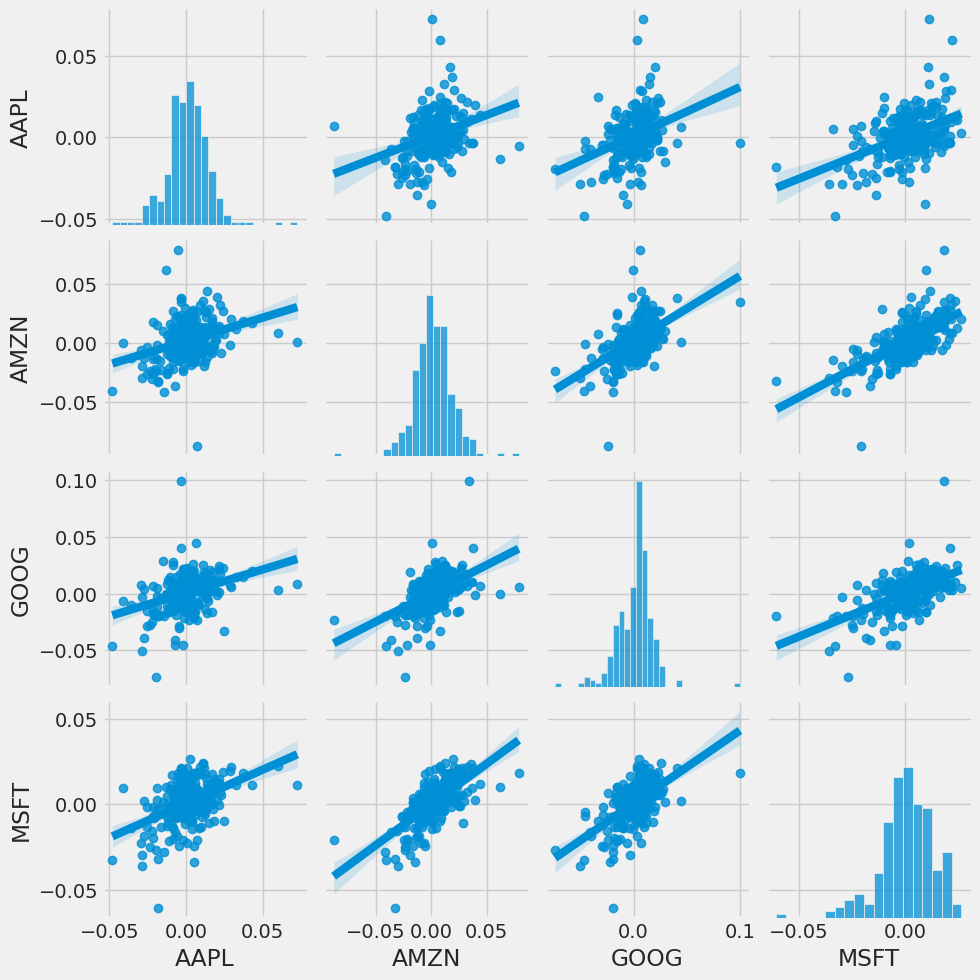

In [ ]:
# Podemos simplesmente chamar pairplot em nosso DataFrame para uma análise
# visual automática de todas as comparações

sns.pairplot(tech_rets, kind='reg')

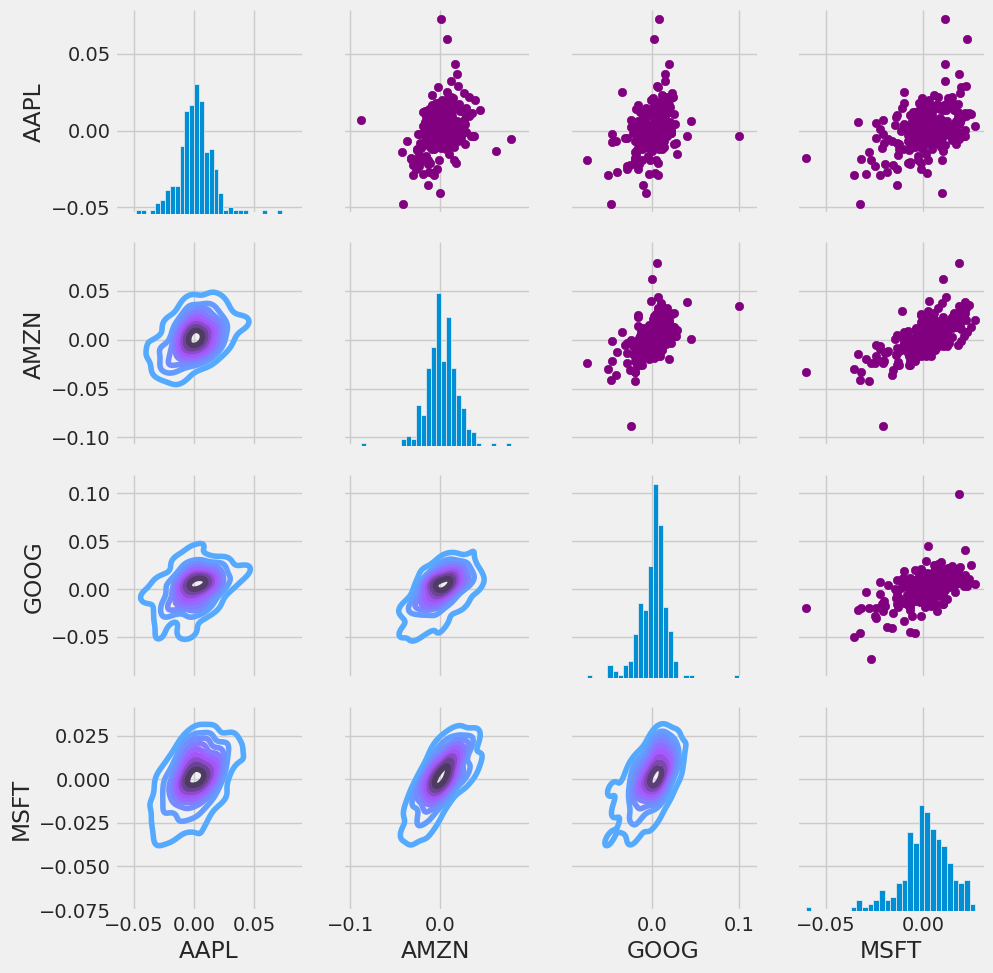

In [ ]:
# Configurar nossa figura nomeando-a returns_fig, chamar PairPLot no DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Usar map_upper para especificar como será a aparência do triângulo superior.
return_fig.map_upper(plt.scatter, color='purple')

# Definir o triângulo inferior na figura, incluindo o tipo de plotagem (kde)
#  ou o mapa de cores (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Definir a diagonal como uma série de gráficos de histograma do retorno diário
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

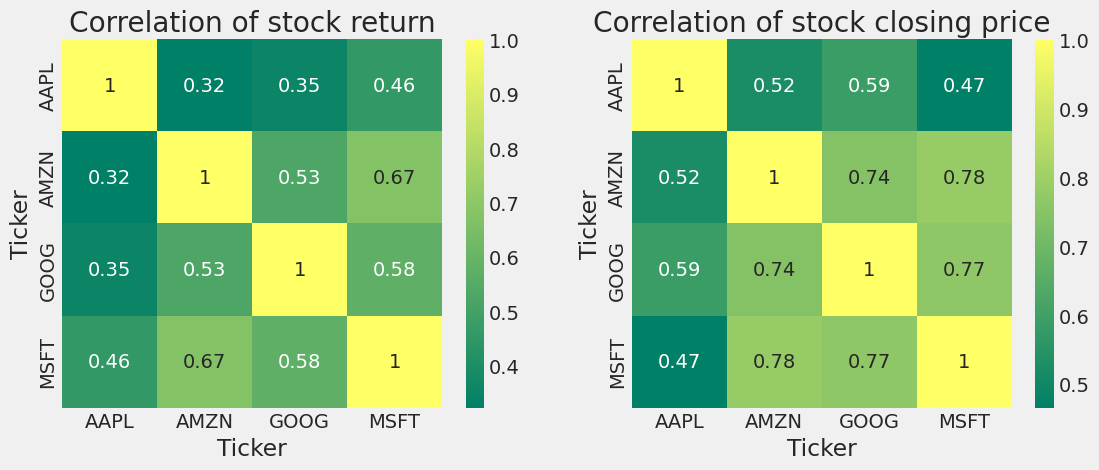

In [ ]:
# Fazer um gráfico de correlação
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

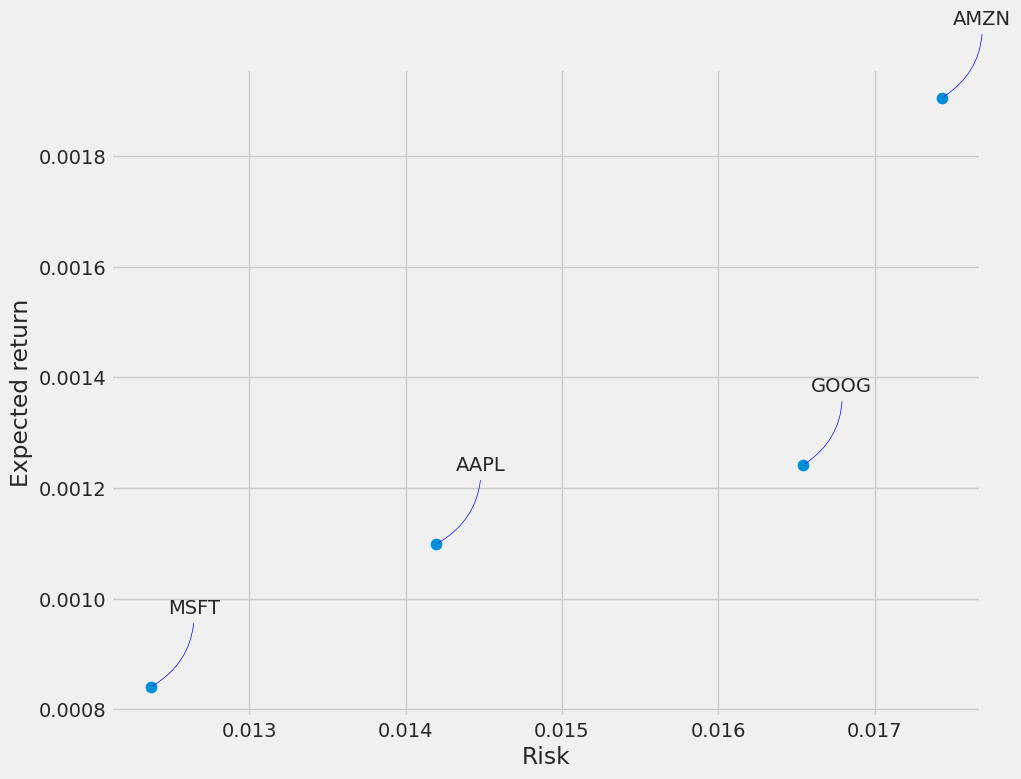

In [ ]:
# Quanto valor colocamos em risco ao investir em uma ação específica?

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.std(), rets.mean(), s=area)
plt.xlabel('Risk')
plt.ylabel('Expected return')

for label, x, y in zip(rets.columns, rets.std(), rets.mean()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
# Previsão do preço de fechamento das ações da APPLE inc:

df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2012-01-03,12.388994,14.686786,14.732143,14.607143,14.621429,302220800
2012-01-04,12.455575,14.765714,14.810000,14.617143,14.642857,260022000
2012-01-05,12.593861,14.929643,14.948214,14.738214,14.819643,271269600
2012-01-06,12.725513,15.085714,15.098214,14.972143,14.991786,318292800
2012-01-09,12.705326,15.061786,15.276786,15.048214,15.196429,394024400
...,...,...,...,...,...,...
2024-12-03,242.649994,242.649994,242.759995,238.899994,239.809998,38861000
2024-12-04,243.009995,243.009995,244.110001,241.250000,242.869995,44383900


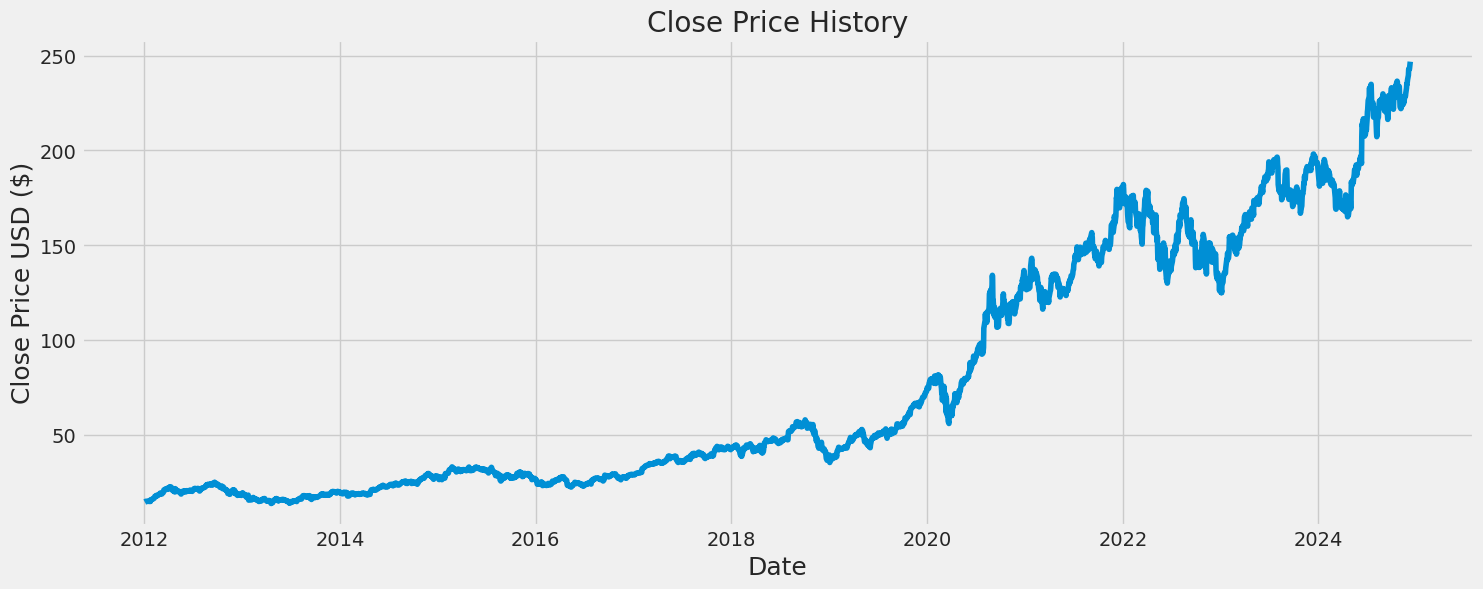

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# dataframe apenas com a coluna 'Fechar'
df_close = yf.download('AAPL', start=start, end=end)['Close']

data = df_close
# Converter o dataframe em uma matriz numpy
dataset = data.values
# Obter o número de linhas para treinar o modelo
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

[*********************100%***********************]  1 of 1 completed


239

In [ ]:
# Dimensionar os dados
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.34470939],
       [0.36342516],
       [0.40318051],
       [0.4050153 ],
       [0.39840988],
       [0.37785932],
       [0.39070339],
       [0.36489299],
       [0.36305801],
       [0.34984717],
       [0.3431193 ],
       [0.34434243],
       [0.34960247],
       [0.33675839],
       [0.25247706],
       [0.23547401],
       [0.2068502 ],
       [0.1979204 ],
       [0.25149844],
       [0.24636085],
       [0.25920492],
       [0.2518654 ],
       [0.25590212],
       [0.22788997],
       [0.21626902],
       [0.28905205],
       [0.32489294],
       [0.35339449],
       [0.36917422],
       [0.36085627],
       [0.35681955],
       [0.33541282],
       [0.32697242],
       [0.28183478],
       [0.23730879],
       [0.26740062],
       [0.25504595],
       [0.2774311 ],
       [0.29724774],
       [0.29859332],
       [0.28526003],
       [0.29174319],
       [0.27094794],
       [0.24513753],
       [0.23425069],
       [0.23070337],
       [0.21174309],
       [0.202

In [ ]:
# Conjunto de dados de treinamento
# Conjunto de dados de treinamento em escala
train_data = scaled_data[0:int(training_data_len), :]
# Dividir os dados em conjuntos de dados x_train e y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Converta x_train e y_train em matrizes numpy
x_train, y_train = np.array(x_train), np.array(y_train)

# Remodelando dados
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.34470939, 0.36342516, 0.40318051, 0.4050153 , 0.39840988,
       0.37785932, 0.39070339, 0.36489299, 0.36305801, 0.34984717,
       0.3431193 , 0.34434243, 0.34960247, 0.33675839, 0.25247706,
       0.23547401, 0.2068502 , 0.1979204 , 0.25149844, 0.24636085,
       0.25920492, 0.2518654 , 0.25590212, 0.22788997, 0.21626902,
       0.28905205, 0.32489294, 0.35339449, 0.36917422, 0.36085627,
       0.35681955, 0.33541282, 0.32697242, 0.28183478, 0.23730879,
       0.26740062, 0.25504595, 0.2774311 , 0.29724774, 0.29859332,
       0.28526003, 0.29174319, 0.27094794, 0.24513753, 0.23425069,
       0.23070337, 0.21174309, 0.20256878, 0.21186553, 0.23694184,
       0.21431198, 0.19767589, 0.21565755, 0.20085625, 0.19266055,
       0.17932726, 0.12354748, 0.06262991, 0.05039749, 0.04892966])]
[0.07009169085674705]

[array([0.34470939, 0.36342516, 0.40318051, 0.4050153 , 0.39840988,
       0.37785932, 0.39070339, 0.36489299, 0.36305801, 0.34984717,
       0.3431193 , 0.34434243, 0.34

(179, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Construir o modelo LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar o modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0429


In [ ]:
# Criar o conjunto de dados de teste
# Criar uma nova matriz contendo valores escalonados
test_data = scaled_data[training_data_len - 60: , :]
# Criar os conjuntos de dados x_test e y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Converter os dados de numpy para array
x_test = np.array(x_test)

# Remodelando dados
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Obtendo os valores de preços previstos pelos modelos
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Obtendo o erro quadrático médio (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


2.61643426303092

<ipython-input-31-f153a73af3ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


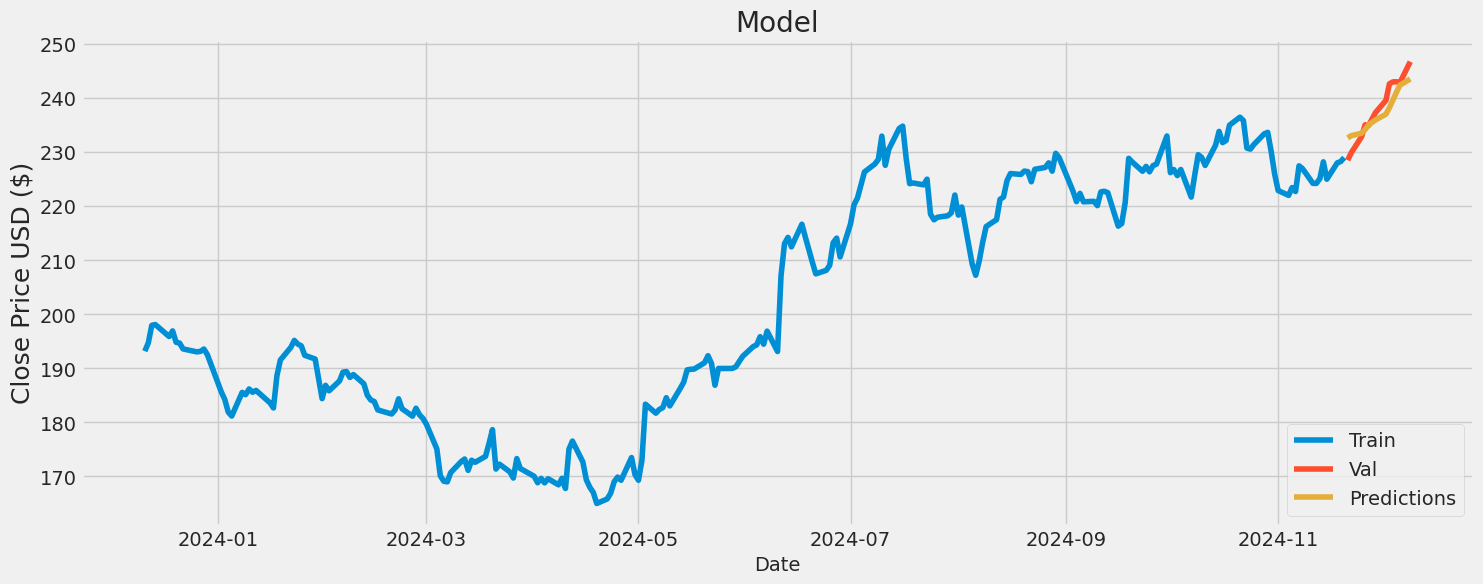

In [ ]:
# Plotando os dados
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
train.columns = ['Close']
valid.columns = ['Close', 'Predictions']

# Visualizando os dados
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Mostrando os preços válidos e previstos
valid

,Close,Predictions
Date,,
2024-11-21,228.520004,232.652954
2024-11-22,229.869995,233.056152
2024-11-25,232.869995,233.514053
2024-11-26,235.059998,234.171646
2024-11-27,234.929993,235.044373
2024-11-29,237.330002,235.970764
2024-12-02,239.589996,237.028137
2024-12-03,242.649994,238.230423
2024-12-04,243.009995,239.631256
